In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create toy dataset
# Apples: small and light
np.random.seed(0)
apples = np.random.multivariate_normal([5, 150], [[0.5, 10], [10, 100]], size=20)

# Oranges: big and heavy
oranges = np.random.multivariate_normal([7, 200], [[0.5, 10], [10, 100]], size=20)

# Combine data
X = np.vstack((apples, oranges))
y = np.array([0]*20 + [1]*20)  # 0 = apple, 1 = orange


C:\Users\nbeja\AppData\Local\Temp\ipykernel_3948\4254478586.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  apples = np.random.multivariate_normal([5, 150], [[0.5, 10], [10, 100]], size=20)
C:\Users\nbeja\AppData\Local\Temp\ipykernel_3948\4254478586.py:10: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  oranges = np.random.multivariate_normal([7, 200], [[0.5, 10], [10, 100]], size=20)


In [2]:
# 2. Compute class means
mean_apple = np.mean(apples, axis=0)
mean_orange = np.mean(oranges, axis=0)
mean_diff = (mean_orange - mean_apple).reshape(-1, 1)


In [3]:
# 3. Compute within-class scatter matrix
S1 = (apples - mean_apple).T @ (apples - mean_apple)
S2 = (oranges - mean_orange).T @ (oranges - mean_orange)
S_W = S1 + S2


In [4]:
# 4. Compute Fisher projection vector
w = np.linalg.inv(S_W) @ mean_diff
w = w / np.linalg.norm(w)  # normalize for clean projection


In [5]:
# 5. Project data onto LDA vector
projected_apples = (apples @ w).flatten()
projected_oranges = (oranges @ w).flatten()


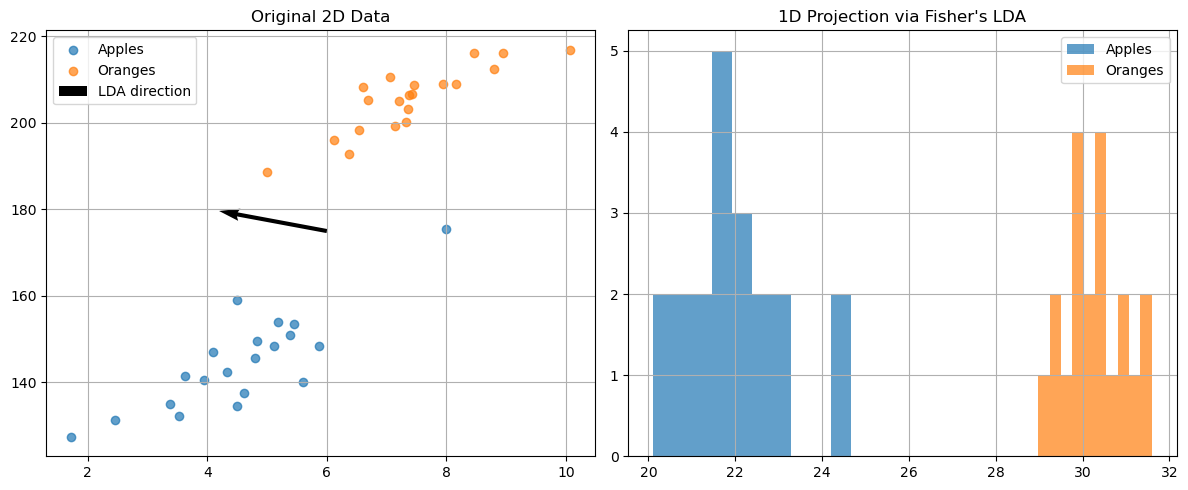

In [6]:
# 6. Visualize original data and projections
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot original 2D data
ax[0].scatter(apples[:, 0], apples[:, 1], label="Apples", alpha=0.7)
ax[0].scatter(oranges[:, 0], oranges[:, 1], label="Oranges", alpha=0.7)
ax[0].quiver(6, 175, w[0], w[1], scale=5, color='black', label="LDA direction")
ax[0].set_title("Original 2D Data")
ax[0].legend()
ax[0].grid(True)

# Plot projections in 1D
ax[1].hist(projected_apples, bins=10, alpha=0.7, label="Apples")
ax[1].hist(projected_oranges, bins=10, alpha=0.7, label="Oranges")
ax[1].set_title("1D Projection via Fisher's LDA")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()
